In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('AMDTRAIN.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-10-17,4.90,4.90,4.65,4.67,4.67,16611900
1,2011-10-18,4.68,4.84,4.57,4.83,4.83,21338700
2,2011-10-19,4.90,4.92,4.69,4.73,4.73,18304000
3,2011-10-20,4.72,4.76,4.45,4.54,4.54,25240900
4,2011-10-21,4.65,4.73,4.61,4.72,4.72,13915400


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 1927):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [6]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1867/1867 [==============================] - 12s 7ms/step - loss: 0.0112
Epoch 2/100
1867/1867 [==============================] - 9s 5ms/step - loss: 0.0035
Epoch 3/100
1867/1867 [==============================] - 9s 5ms/step - loss: 0.0032
Epoch 4/100
1867/1867 [==============================] - 9s 5ms/step - loss: 0.0026
Epoch 5/100
1867/1867 [==============================] - 9s 5ms/step - loss: 0.0020A: 0s - loss: 0.002
Epoch 6/100
1867/1867 [==============================] - 9s 5ms/step - loss: 0.0023
Epoch 7/100
1867/1867 [==============================] - 9s 5ms/step - loss: 0.0022
Epoch 8/100
1867/1867 [==============================] - 9s 5ms/step - loss: 0.0024
Epoch 9/100
1867/1867 [==============================] - 9s 5ms/step - loss: 0.0018
Epoch 10/100
1867/1867 [==============================] - 9s 5ms/step - loss: 0.0020
Epoch 11/100
1867/1867 [==============================] - 9s 5ms/step - loss: 0.0021
Epoch 12/100
1867/1867 [==============================

1867/1867 [==============================] - 9s 5ms/step - loss: 8.1837e-04
Epoch 96/100
1867/1867 [==============================] - 9s 5ms/step - loss: 8.1773e-04
Epoch 97/100
1867/1867 [==============================] - 9s 5ms/step - loss: 9.1522e-04
Epoch 98/100
1867/1867 [==============================] - 9s 5ms/step - loss: 7.6861e-04
Epoch 99/100
1867/1867 [==============================] - 9s 5ms/step - loss: 7.8703e-04
Epoch 100/100
1867/1867 [==============================] - 9s 5ms/step - loss: 6.8097e-04


In [7]:
dataset_test = pd.read_csv('AMDTEST.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [8]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 169):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

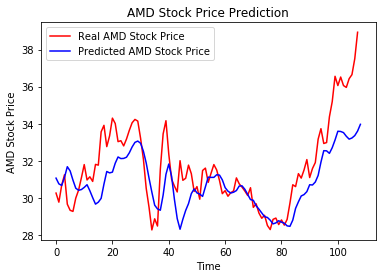

In [9]:
plt.plot(real_stock_price, color = 'red', label = 'Real AMD Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted AMD Stock Price')
plt.title('AMD Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMD Stock Price')
plt.legend()
plt.show()